In [17]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [18]:
# Importing original datasets

gaia = pd.read_csv('data_input/star_table_Gulliver_27.csv')
u = pd.read_csv('data_input/u.csv')

main_sequence = pd.read_csv('data_input/lines_UBPRPG.txt', delimiter = '\s')

/tmp/ipykernel_6118/2370133764.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  main_sequence = pd.read_csv('data_input/lines_UBPRPG.txt', delimiter = '\s')


In [19]:
gaia['id'] = range(1, len(gaia) + 1)  # Adding an id column to the gaia dataset
gaia

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,ruwe,nu_eff_used_in_astrometry,...,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,phot_bp_rp_excess_factor,phot_g_mean_flux,duplicated_source,l,b,id
0,5309198602908747392,145.958788,0.082720,-54.139326,0.084538,0.322736,0.095284,3.387100,1.029419,1.422282,...,18.067581,18.783112,17.256748,1.526363,1.263465,1116.643698,False,277.604931,-0.762961,1
1,5309198602908171008,145.960907,0.094661,-54.141124,0.097531,0.263986,0.109377,2.413541,1.045674,NaN,...,18.233160,19.089861,17.257614,1.832247,1.363235,958.699499,False,277.607044,-0.763521,2
2,5309198602908747264,145.965749,0.126837,-54.139457,0.125893,0.064643,0.144160,0.448414,1.011313,1.421753,...,18.692368,19.426849,17.925753,1.501097,1.221524,628.057975,False,277.608116,-0.760411,3
3,5309198602908747776,145.960875,0.165742,-54.136537,0.158051,0.382424,0.183692,2.081879,1.059646,NaN,...,18.966375,19.742834,18.128950,1.613884,1.265015,487.973514,False,277.604048,-0.760047,4
4,5309198602908748672,145.953532,0.082501,-54.135588,0.080785,0.039058,0.090949,0.429448,1.064105,1.295334,...,17.857218,19.123318,16.719728,2.403589,1.426030,1355.376042,False,277.600161,-0.762122,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,5308823639401329280,145.886014,0.089044,-54.110131,0.086771,0.087560,0.097249,0.900373,1.015107,NaN,...,18.003555,18.674049,17.222189,1.451860,1.255571,1184.471858,False,277.553543,-0.768515,3518
3518,5308824390997671296,145.882169,0.057400,-54.102496,0.054072,0.277356,0.062556,4.433734,1.069486,1.458931,...,17.271399,17.852419,16.544554,1.307865,1.246828,2324.809961,False,277.546863,-0.764184,3519
3519,5308824390997671424,145.878897,0.067810,-54.103086,0.062646,0.193255,0.072859,2.652444,0.979612,1.429966,...,17.612238,18.275681,16.825703,1.449978,1.262246,1698.445773,False,277.545790,-0.765881,3520
3520,5308824395294124160,145.879590,0.152213,-54.106687,0.144616,0.407133,0.169678,2.399448,0.953660,1.392011,...,18.941441,19.769030,18.079523,1.689507,1.269465,499.310106,False,277.548442,-0.768350,3521


In [20]:
u['id'] = range(1, len(u) + 1)  # Adding an id column to the u dataset
u

,ra,dec,u,id
0,146.23478,-54.13500,18.364,1
1,146.23275,-54.13237,19.088,2
2,146.22947,-54.11631,20.435,3
3,146.22771,-54.13752,20.318,4
4,146.22661,-54.11737,16.459,5
...,...,...,...,...
658,146.00464,-54.08724,20.062,659
659,146.11863,-54.08439,20.010,660
660,145.99030,-54.20332,17.309,661
661,146.13695,-54.11095,20.268,662


In [21]:
main_sequence

,BP-RP,U-BP,U-RP,U-G
0,-0.0043,-0.5676,-0.5719,-0.5829
1,-0.0383,-0.1974,-0.2357,-0.2053
2,0.0593,0.0105,0.0698,0.0278
3,0.0147,-0.1286,-0.1139,-0.1199
4,-0.0241,-0.1243,-0.1484,-0.1275
...,...,...,...,...
132,0.2625,0.2379,0.5004,0.3328
133,1.1361,0.0627,1.1988,0.5554
134,0.8178,-1.0801,-0.2623,-0.7469
135,0.6261,0.3461,0.9722,0.5964


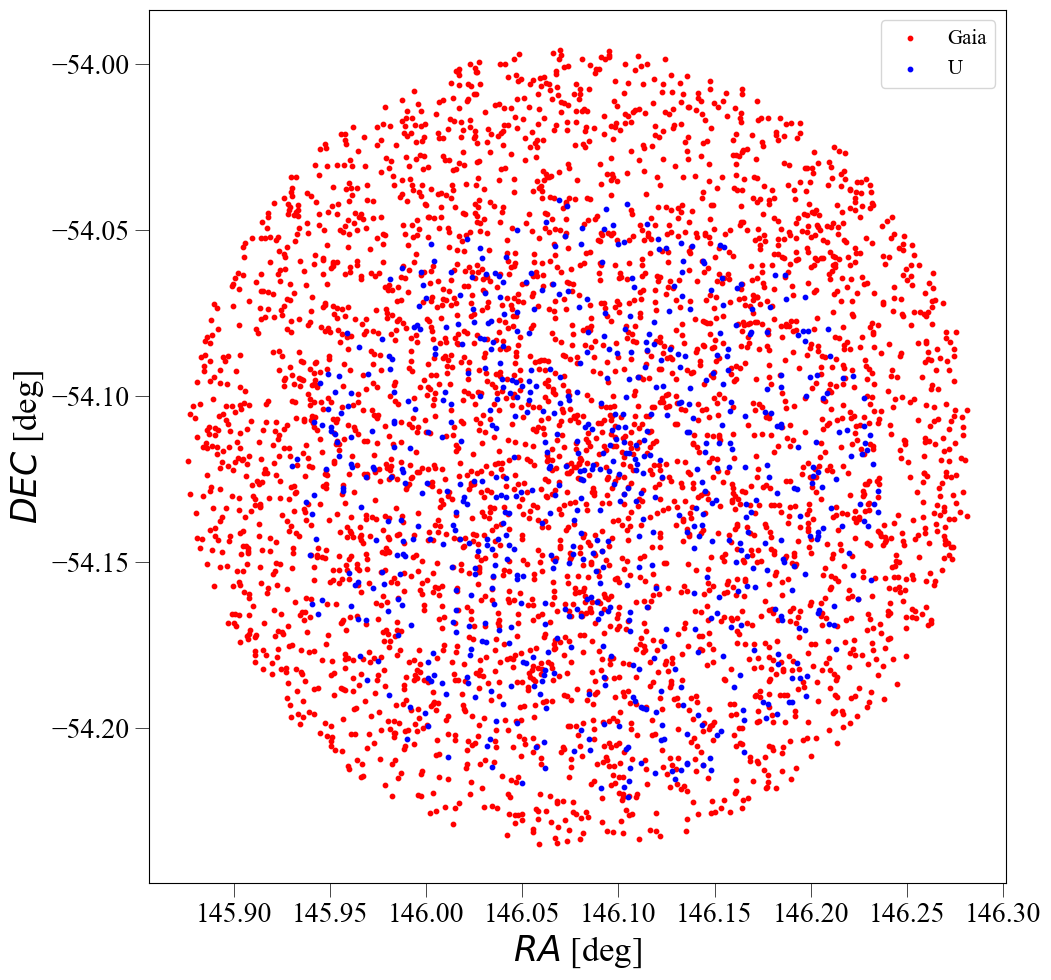

In [22]:
# Plotting RA-DEC positions 

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$RA$ [deg]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$DEC$ [deg]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(gaia['ra'], gaia['dec'], color='red', s=10, label='Gaia')
ax.scatter(u['ra'], u['dec'], color='blue', s=10, label='U')

# calculating the mean coordinates for each dataset (baisically the center of the gaia dataset)
mean_gaia_ra = gaia['ra'].mean()
mean_gaia_dec = gaia['dec'].mean()

# plotting the center of the gaia dataset
# ax.axvline(x=mean_gaia_ra, color='r', linestyle='--')
# ax.axhline(y=mean_gaia_dec, color='r', linestyle='--')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig('plots/sky_coords.png', bbox_inches='tight')

In [23]:
# Saving data in ASCII format, also selecting columns we need (id, ra, dec, and mag)

gaia_mag = 'phot_g_mean_mag' # choosing filter for Gaia we will use

gaia_selected = gaia[['id', 'ra', 'dec', gaia_mag]]
gaia_selected.to_csv('data_output/gaia_sky.dat', sep='\t', index=False, header=False)

u_selected = u[['id', 'ra', 'dec', 'u']]
u_selected.to_csv('data_output/u_sky.dat', sep='\t', index=False, header=False)

In [24]:
# Changing coordinates from RA-DEC to x-y

os.system(f'project_coords data_output/gaia_sky.dat 1 2 {mean_gaia_ra} {mean_gaia_dec} asec outfile=data_output/gaia_cart.dat')
os.system(f'project_coords data_output/u_sky.dat 1 2 {mean_gaia_ra} {mean_gaia_dec} asec outfile=data_output/u_cart.dat')

0

In [25]:
# Importing datasets with new coordinates

gaia_cart = pd.read_csv('data_output/gaia_cart.dat', sep='\s+', header=None, names=['id', 'x', 'y', gaia_mag])
u_cart = pd.read_csv('data_output/u_cart.dat', sep='\s+', header=None, names=['id', 'x', 'y', 'u'])

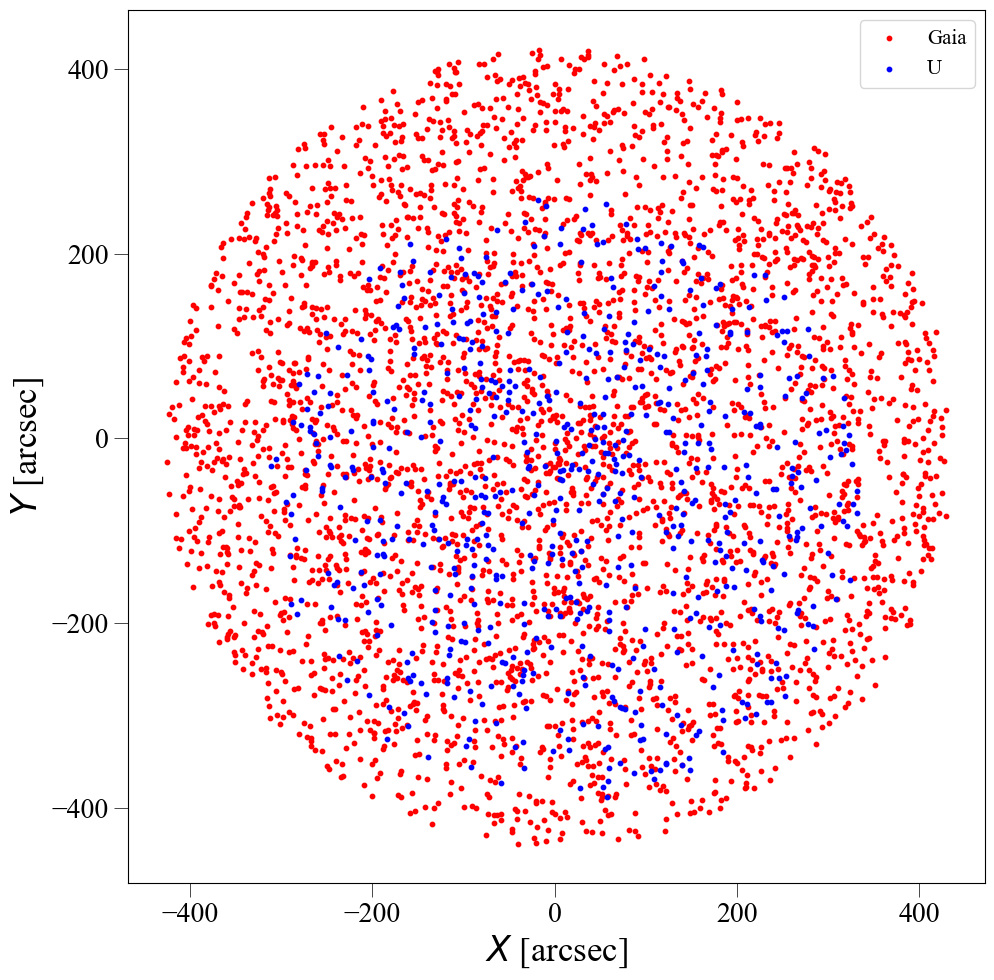

In [26]:
# Plotting X-Y positions

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$X$ [arcsec]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$Y$ [arcsec]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(gaia_cart['x'], gaia_cart['y'], color='red', s=10, label='Gaia')
ax.scatter(u_cart['x'], u_cart['y'], color='blue', s=10, label='U')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig('plots/cart_coords.png', bbox_inches='tight')

In [27]:
# Matching the datasets
#http://spiff.rit.edu/match/match-0.16/match.html
# parameters like: matchrad=3.0 trirad=0.001 nobj=40 recalc is changable and requares playing with them to get the best result

os.system('match data_output/gaia_cart.dat 1 2 3 data_output/u_cart.dat 1 2 3 outfile=data_output/matched id1=0 id2=0 matchrad=3.0 trirad=0.001 nobj=40 recalc')

TRANS: a=1.524887130e+01 b=9.854129096e-01 c=1.121725093e-02 d=-7.221805097e+00 e=-1.131112851e-02 f=9.909287635e-01 sig=3.6023e-03 Nr=599 Nm=635 sx=4.7662e-02 sy=4.4050e-02 


0

In [28]:
# Importing matched datasets

gaia_matched = pd.read_csv('data_output/matched.mtA', sep='\s+', header=None, names=['id', 'x', 'y', gaia_mag])
u_matched = pd.read_csv('data_output/matched.mtB', sep='\s+', header=None, names=['id', 'x', 'y', 'u'])

In [29]:
# List of columns to add
columns_to_add = ['phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp']

# Remove the column represented by the variable gaia_mag
columns_to_add.remove(gaia_mag)

# Merge the dataframes on the 'id' column
gaia_matched = pd.merge(gaia_matched, gaia[['id'] + columns_to_add], on='id')

gaia_matched

,id,x,y,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp
0,1107,331.197645,-80.339009,15.2858,15.687677,14.667129,1.020549
1,1108,326.951291,-70.913872,15.9736,16.374556,15.366053,1.008503
2,1116,320.167214,-13.099834,17.1120,17.618706,16.450228,1.168478
3,1073,316.223395,-89.417865,16.7579,17.302940,16.061943,1.240997
4,2347,314.112556,-16.896401,13.9718,14.198249,13.595833,0.602416
...,...,...,...,...,...,...,...
630,1697,122.759897,7.195705,14.9323,15.181817,14.493371,0.688446
631,2691,230.595767,176.824536,13.9376,14.170198,13.542500,0.627698
632,1258,121.993301,-351.078547,15.7212,16.049036,14.932290,1.116746
633,3206,-184.025253,-326.035713,14.4402,14.803876,13.884714,0.919162


In [30]:
u_matched['u-g'] = u_matched['u'] - gaia_matched['phot_g_mean_mag'] # calculating u-g color
u_matched

,id,x,y,u,u-g
0,1,331.29351,-80.36172,18.364,3.0782
1,2,327.03268,-70.88428,19.088,3.1144
2,3,320.23827,-13.05333,20.435,3.3230
3,4,316.36252,-89.40133,20.318,3.5601
4,5,314.19532,-16.85650,16.459,2.4872
...,...,...,...,...,...
630,655,122.70613,7.18386,17.703,2.7707
631,657,230.66165,176.90441,16.491,2.5534
632,658,122.05361,-351.16013,18.964,3.2428
633,661,-184.04968,-326.05984,17.309,2.8688


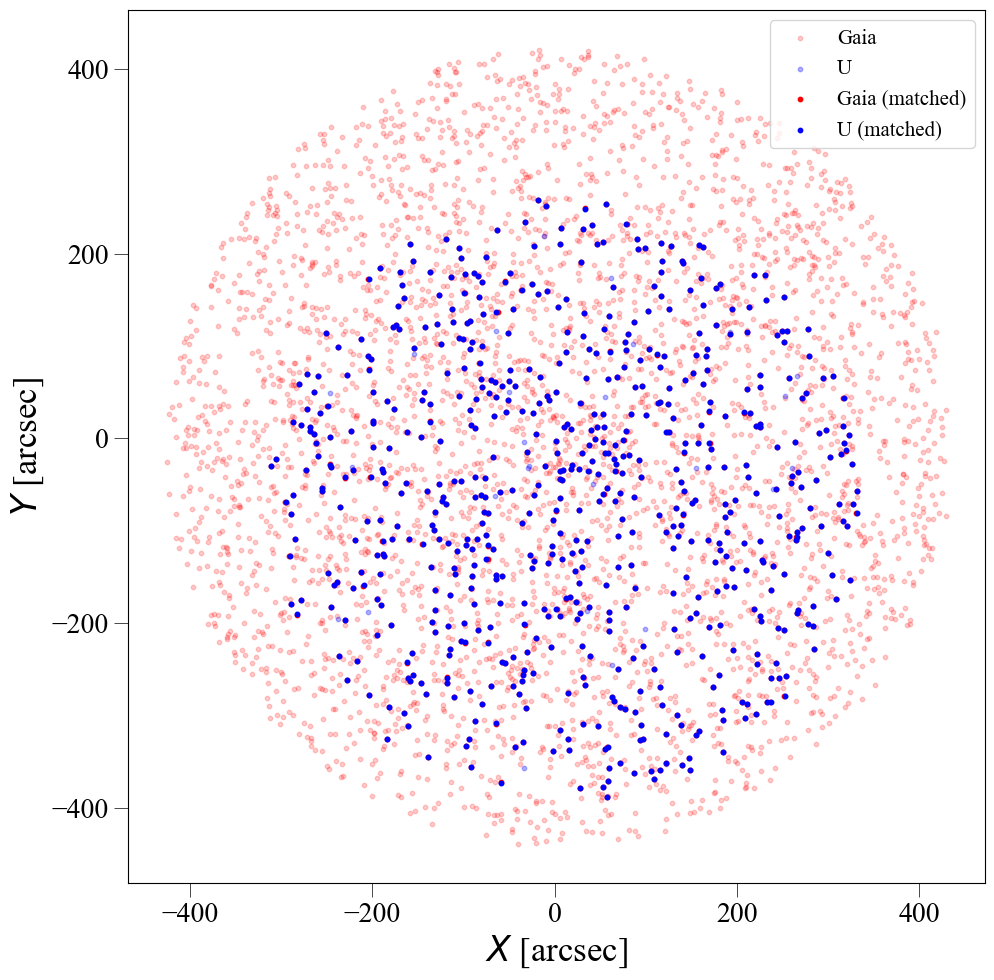

In [31]:
# Plotting X-Y positions of matched stars

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$X$ [arcsec]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$Y$ [arcsec]")
ax.yaxis.label.set_fontsize(25)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(gaia_cart['x'], gaia_cart['y'], color='red', s=10, label='Gaia', alpha=0.2)
ax.scatter(u_cart['x'], u_cart['y'], color='blue', s=10, label='U', alpha=0.3)

ax.scatter(gaia_matched['x'], gaia_matched['y'], color='red', s=10, label='Gaia (matched)')
ax.scatter(u_matched['x'], u_matched['y'], color='blue', s=10, label='U (matched)')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig('plots/cart_coords_matched.png', bbox_inches='tight')

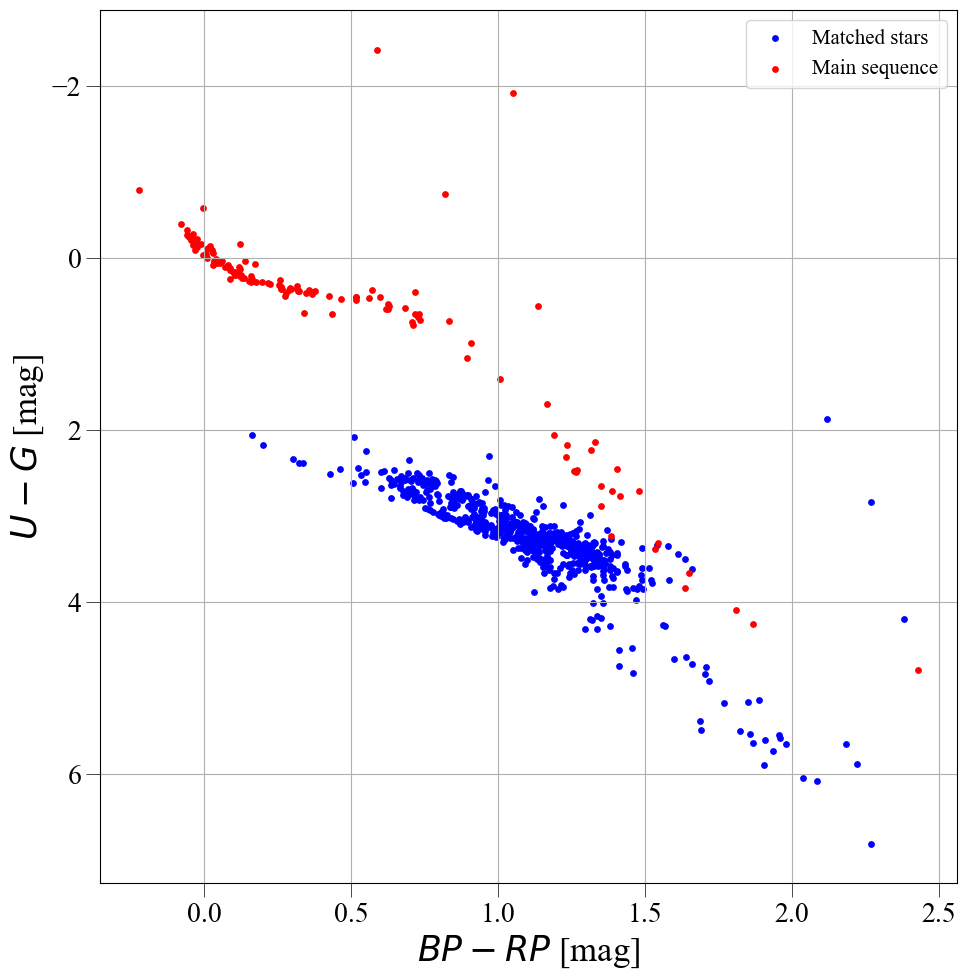

In [32]:
# Plotting colour-colour diagram

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(15)
ax.set_xlabel(r"$BP-RP$ [mag]")
ax.xaxis.label.set_fontsize(25)
ax.set_ylabel(r"$U-G$ [mag]")
ax.yaxis.label.set_fontsize(25)
ax.invert_yaxis()
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=20)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=20)
# plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  

ax.scatter(gaia_matched['bp_rp'], u_matched['u-g'], color='blue', s=15, label='Matched stars')

ax.scatter(main_sequence['BP-RP'], main_sequence['U-G'], color='red', s=15, label='Main sequence')

ax.legend(loc='upper right', fontsize=15)

plt.show() 

fig.savefig('plots/BP-RP_U-G.png', bbox_inches='tight')